<a href="https://colab.research.google.com/github/yogeshk1234/Caps/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




#<b>Import All Required Libraries.</b>




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing CSV File.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project 1- /Global Terrorism Data.csv", encoding = 'latin1')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

#<b>Required Columns For Analysis

In [ ]:
df = df[['iyear','country_txt','region_txt','city','latitude','longitude','attacktype1_txt','targtype1_txt','weaptype1_txt','gname','nkill','nwound']]
df.head()

,iyear,country_txt,region_txt,city,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,gname,nkill,nwound
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,MANO-D,1.0,0.0
1,1970,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League,0.0,0.0
2,1970,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown,NaN,NaN
4,1970,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown,NaN,NaN


#<b>Cleaning The Data</b>

In [ ]:
df1=df.rename(columns = {'iyear':'Year','country_txt':'Country','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType','targtype1_txt':'TargetType','weaptype1_txt':'WeaponType','gname':'GroupName','nkill':'Killed','nwound':'Wounded'})
df1.head()

,Year,Country,Region,City,Latitude,Longitude,AttackType,TargetType,WeaponType,GroupName,Killed,Wounded
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,MANO-D,1.0,0.0
1,1970,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League,0.0,0.0
2,1970,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown,NaN,NaN
4,1970,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown,NaN,NaN


In [ ]:
df1.isnull().sum()

Year              0
Country           0
Region            0
City            434
Latitude       4556
Longitude      4557
AttackType        0
TargetType        0
WeaponType        0
GroupName         0
Killed        10313
Wounded       16311
dtype: int64

In [ ]:
df1['Killed']=df1['Killed'].fillna(0)
df1['Wounded']=df1['Wounded'].fillna(0)

#<b>Data Visualization</b>
##<b>1. Year wise Attacks</b>

##1.Total Attacks in each Year

In [ ]:
Attacks = df1['Year'].value_counts(dropna = False).sort_index().reset_index().rename(columns = {'index':'Year','Year':'Attacks'}).set_index('Year')
Attacks.head(10)

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526


##2. Killed in each Year

In [ ]:
killed_each_year = df1[['Year','Killed']].groupby('Year').sum()
killed_each_year.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


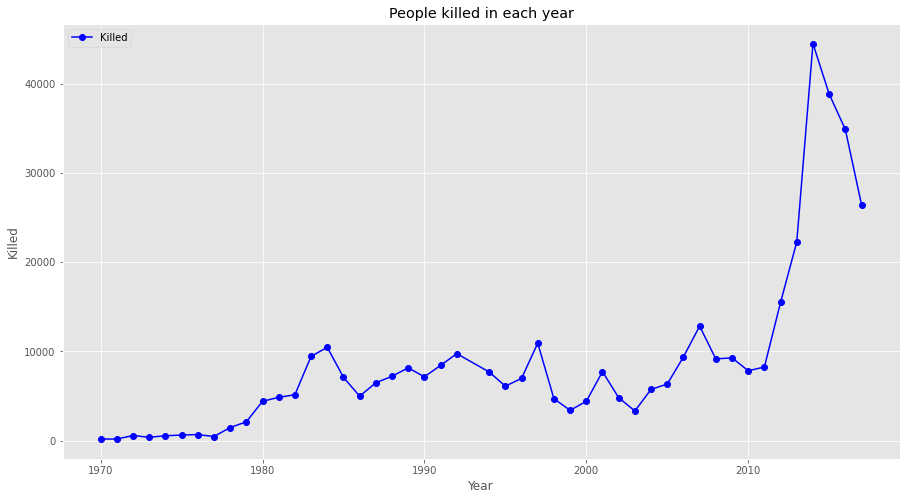

In [ ]:
from matplotlib import style
style.use('ggplot')
killed_each_year.plot(marker = 'o',color = 'b',figsize = (15,8))
plt.title('People killed in each year')
plt.xlabel('Year')
plt.ylabel('Killed')
plt.legend(loc = 2)
plt.show()

##3. Wounded in each Year

In [ ]:
Wounded_each_year = df1[['Year','Wounded']].groupby('Year').sum()
Wounded_each_year.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


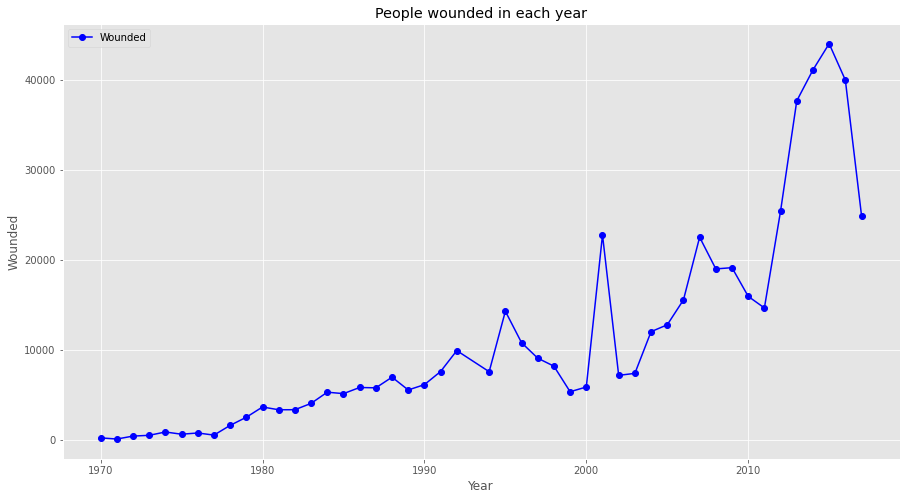

In [ ]:
from matplotlib import style
style.use('ggplot')
Wounded_each_year.plot(marker = 'o',color = 'b',figsize = (15,8))
plt.title('People wounded in each year')
plt.xlabel('Year')
plt.ylabel('Wounded')
plt.legend(loc = 2)
plt.show()

##<b>2. City wise Attacks</b>

##1.Total Attacks in each City

In [ ]:
City = df1['City'].value_counts()[1:20]
City

Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Name: City, dtype: int64

##2. Killed in each City

In [ ]:
killed_each_city = df1[['City','Killed']].groupby('City').sum().sort_values(by = 'Killed',ascending = False).drop('Unknown')
killed_each_city.head()

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0


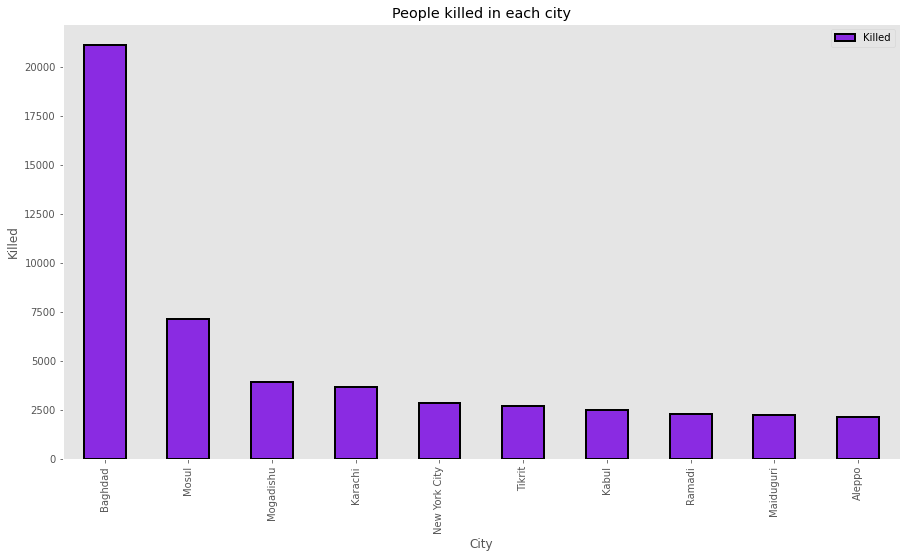

In [ ]:
killed_each_city[:10].plot(kind = 'bar',edgecolor = 'black',color = 'blueviolet',linewidth = 2,figsize = (15,8),grid = False)
plt.title('People killed in each city')
plt.xlabel('City')
plt.ylabel('Killed')
plt.show()

##2. Wounded in each City

In [ ]:
wounded_each_city = df1[['City','Wounded']].groupby('City').sum().sort_values(by = 'Wounded',ascending = False).drop('Unknown')
wounded_each_city.head()

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0


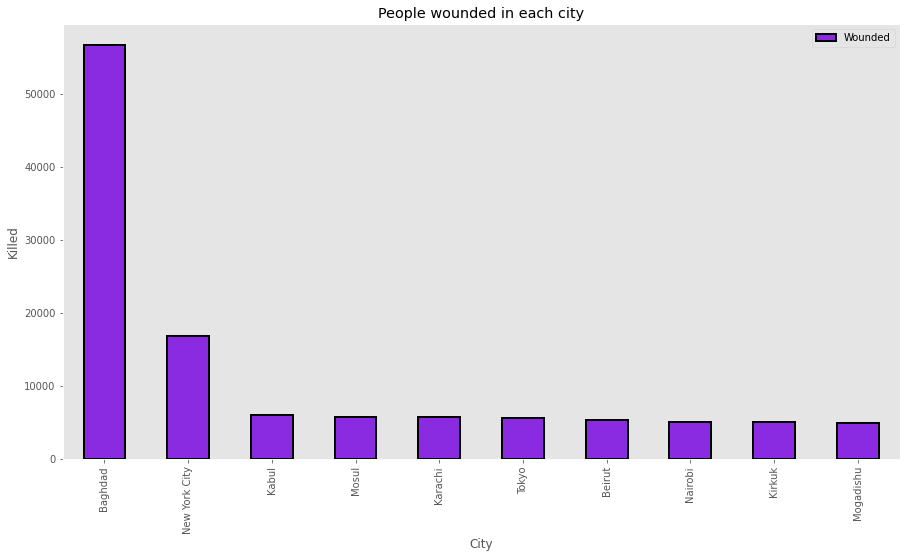

In [ ]:
wounded_each_city[:10].plot(kind = 'bar',edgecolor = 'black',color = 'blueviolet',linewidth = 2,figsize = (15,8),grid = False)
plt.title('People wounded in each city')
plt.xlabel('City')
plt.ylabel('Killed')
plt.show()

##<b>3. Type wise Attacks</b>

##1.Total Attacks by each Type of Attacks

In [ ]:
attacts_type = df1['AttackType'].value_counts()
attacts_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

##2.Total Killed by each Type of Attacks

In [ ]:
killed_by_each_typeof_attacks = df1[['AttackType','Killed']].groupby('AttackType').sum().sort_values(by = 'Killed',ascending = False).drop('Unknown')
killed_by_each_typeof_attacks.head()

,Killed
AttackType,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0


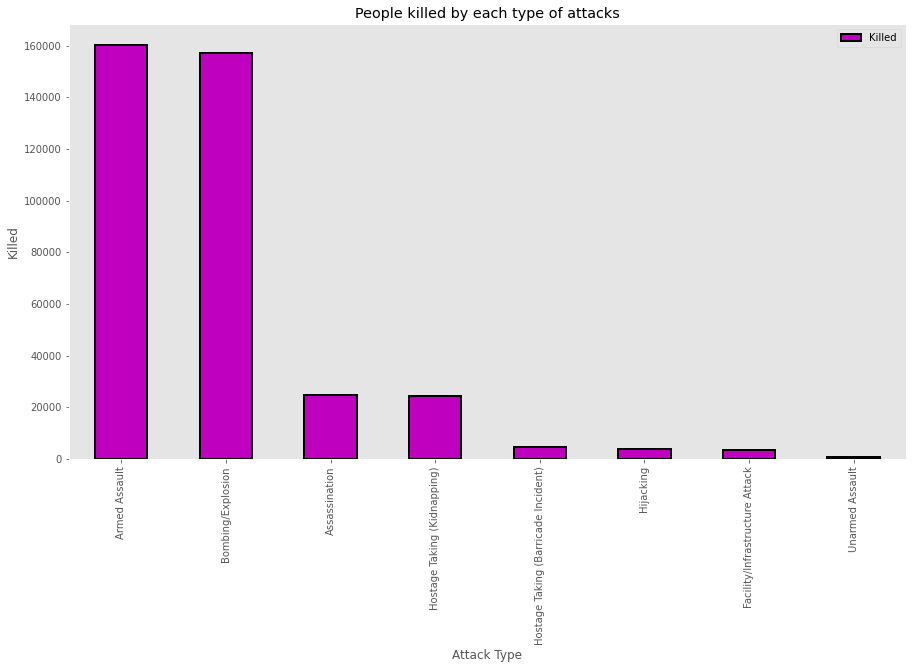

In [ ]:
killed_by_each_typeof_attacks.plot(kind = 'bar',edgecolor = 'black',linewidth = 2,color = 'm',figsize = (15,8),grid = False)
plt.title('People killed by each type of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Killed')
plt.show()

##3.Total Wounded by each Type of Attacks

In [ ]:
wounded_by_each_typeof_attacks = df1[['AttackType','Wounded']].groupby('AttackType').sum().sort_values(by = 'Wounded',ascending = False).drop('Unknown')
wounded_by_each_typeof_attacks.head()

,Wounded
AttackType,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unarmed Assault,14027.0
Assassination,13887.0


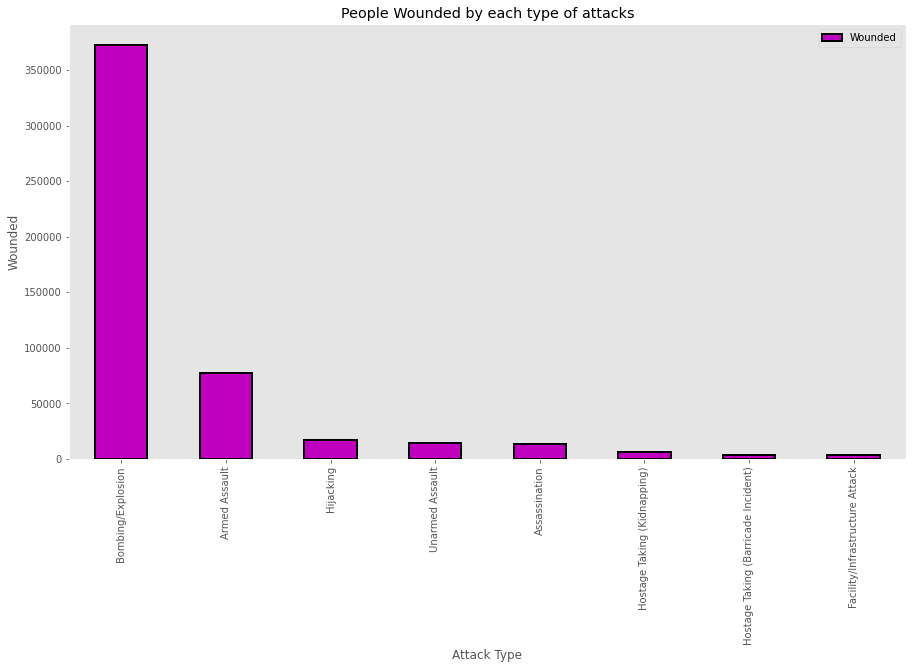

In [ ]:
wounded_by_each_typeof_attacks.plot(kind = 'bar',edgecolor = 'black',linewidth = 2,color = 'm',figsize = (15,8),grid = False)
plt.title('People Wounded by each type of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Wounded')
plt.show()

##<b>4. Group and Country wise Attacks</b>

##1.Country wise Attect by Group



In [ ]:
Country_wise_Atteck_by_Group = df1[['GroupName','Country']].value_counts().drop('Unknown')
Country_wise_Atteck_by_Group.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


GroupName                                         Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

##2.Country wise Killed by Group

In [ ]:
Country_wise_Killed_by_Group = df1[['GroupName','Country','Killed']].groupby(['GroupName','Country'],axis = 0).sum().sort_values(by = 'Killed',ascending = False).drop('Unknown')
Country_wise_Killed_by_Group.head(10)

,,Killed
GroupName,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
Nicaraguan Democratic Force (FDN),Nicaragua,6630.0


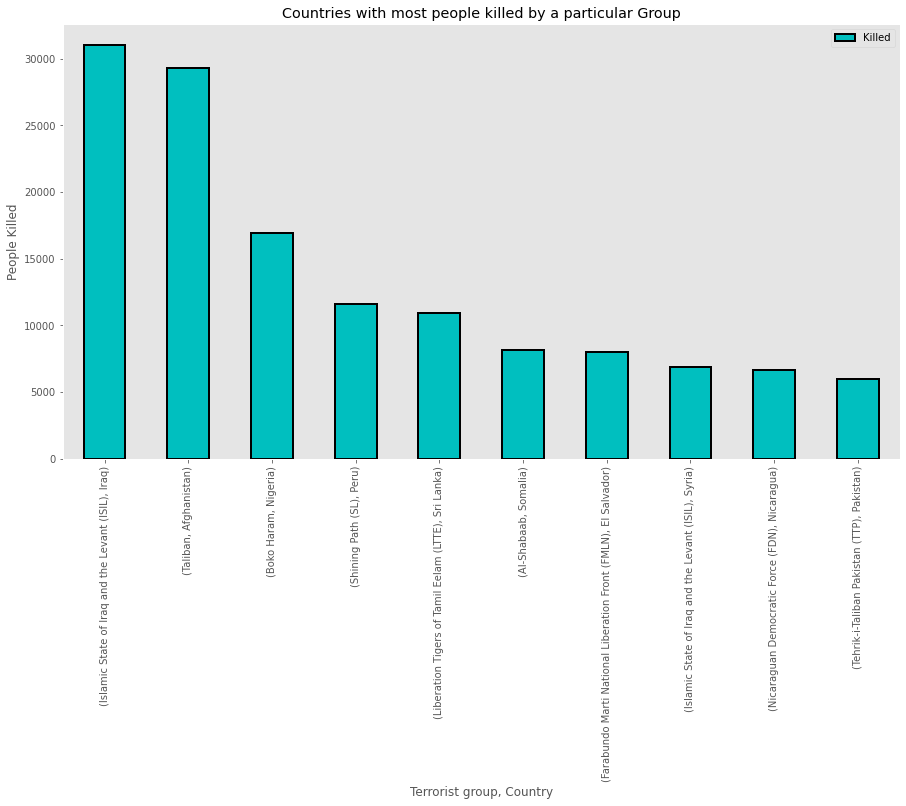

In [ ]:
Country_wise_Killed_by_Group[:10].plot(kind = 'bar',edgecolor = 'black',linewidth = 2,color = 'c',figsize = (15,8),grid = False)
plt.title('Countries with most people killed by a particular Group')
plt.xlabel('Terrorist group, Country')
plt.ylabel('People Killed')
plt.show()

##3.Country wise Wounded by Group

In [ ]:
Country_wise_wounded_by_Group = df1[['GroupName','Country','Wounded']].groupby(['GroupName','Country'],axis = 0).sum().sort_values(by = 'Wounded',ascending = False).drop('Unknown')
Country_wise_wounded_by_Group.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,,Wounded
GroupName,Country,
Taliban,Afghanistan,27871.0
Islamic State of Iraq and the Levant (ISIL),Iraq,23697.0
Al-Qaida,United States,16493.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10991.0
Al-Qaida in Iraq,Iraq,10075.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,9518.0
Boko Haram,Nigeria,7671.0
Al-Shabaab,Somalia,6025.0
Aum Shinri Kyo,Japan,6003.0


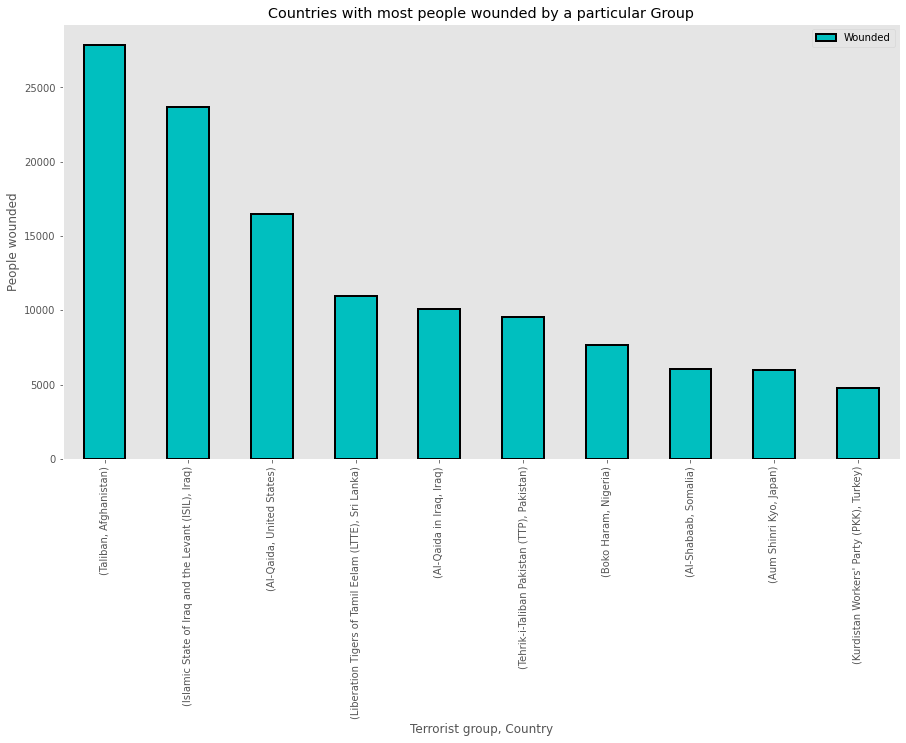

In [ ]:
Country_wise_wounded_by_Group[:10].plot(kind = 'bar',edgecolor = 'black',linewidth = 2,color = 'c',figsize = (15,8),grid = False)
plt.title('Countries with most people wounded by a particular Group')
plt.xlabel('Terrorist group, Country')
plt.ylabel('People wounded')
plt.show()

##<b>5. Humanity Affected by Terrorist Attacks from 1970 to 2017(World-Wide)</b>

##1. Total Killed due to Terrorist Attacks

In [ ]:
total_kill = df1.loc[:,'Killed'].sum()
print(f'Total number of People killed due to Terrorist Attack from 1970 to 2017 across the World \n{total_kill}')

Total number of People killed due to Terrorist Attack from 1970 to 2017 across the World 
411868.0


##2. Total wounded due to Terrorist Attacks

In [ ]:
total_wound = df1.loc[:,'Wounded'].sum()
print(f'Total number of People Wounded due to Terrorist Attack from 1970 to 2017 across the World \n{total_wound}')

Total number of People Wounded due to Terrorist Attack from 1970 to 2017 across the World 
523869.0
